<a href="https://colab.research.google.com/github/DiegoSobral/Football_dataScience_Project/blob/main/Estudo_de_Dados_Futebol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória dos Dados



## Descrição Inicial dos Dados

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importando Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import keras
import os

#Importando Database
for dirname, _, filenames in os.walk("/content/drive/MyDrive/mundo_transfermarkt_competicoes_brasileirao_serie_a.csv"):
  for filename in filenames:
      print(os.path.join(dirname, filename))

In [6]:
#Montando Google drive na máquina Virtual
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/mundo_transfermarkt_competicoes_brasileirao_serie_a.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
def resultado_jogo(row):
  if row['gols_mandante'] > row['gols_visitante']:
    return 1
  elif row['gols_mandante'] < row['gols_visitante']:
    return 2
  else:
    return 0

# Aplicando a função à planilha
df['resultado'] = df.apply(lambda row: resultado_jogo(row), axis=1)

# Exibindo o DataFrame com a nova coluna
print(df[['gols_mandante', 'gols_visitante', 'resultado']])


      gols_mandante  gols_visitante  resultado
0               1.0             3.0          2
1               1.0             0.0          1
2               1.0             0.0          1
3               3.0             0.0          1
4               2.0             0.0          1
...             ...             ...        ...
8334            3.0             0.0          1
8335            3.0             1.0          1
8336            3.0             0.0          1
8337            4.0             2.0          1
8338            6.0             0.0          1

[8339 rows x 3 columns]


In [8]:
#Criando DataFrame - Usando arquivo direto do google drive.
df

,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante,resultado
0,2011,2011-05-21,1,Estádio Governador Plácido Castelo,Jailson Macedo Freitas,9422.0,NaN,Ceará SC,Vasco da Gama,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2011,2011-05-22,1,Estádio Orlando Scarpelli,Gutemberg de Paula Fonseca,10231.0,NaN,Figueirense FC,Cruzeiro,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2011,2011-05-28,2,Estádio Cícero Pompeu de Toledo,Felipe Gomes da Silva,9931.0,NaN,São Paulo,Figueirense FC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2011,2011-05-29,2,Estádio São Januário,Franscisco Carlos do Nascimento,4495.0,NaN,Vasco da Gama,América-MG,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2011,2011-06-04,3,Estádio Orlando Scarpelli,Wilson Luiz Seneme,6913.0,NaN,Figueirense FC,Atlético-GO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,2014,2014-06-01,9,Estádio Governador Magalhães Pinto,Luiz Flávio de Oliveira,10283.0,57483.0,Cruzeiro,Flamengo,Marcelo Oliveira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8335,2014,2014-08-10,14,Estádio Cícero Pompeu de Toledo,André Luiz de Freitas Castro,29115.0,67428.0,São Paulo,EC Vitória,Muricy Ramalho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8336,2014,2014-05-31,9,Estádio Durival Britto e Silva,Pablo dos Santos Alves,3127.0,37182.0,Coritiba FC,Goiás EC,Celso Roth,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8337,2014,2014-09-28,25,Estádio Beira-Rio,Luiz Flávio de Oliveira,24522.0,56000.0,Internacional,Coritiba FC,Abel Braga,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [9]:
#Mostrando Número de Linhas e Colunas
num_linhas, num_colunas = df.shape
print(f'O DataFrame possui {num_colunas} colunas e {num_linhas} linhas')

O DataFrame possui 36 colunas e 8339 linhas


In [10]:
#Mostrando tipos de dados
df.dtypes

,0
ano_campeonato,int64
data,object
rodada,int64
estadio,object
arbitro,object
publico,float64
publico_max,float64
time_mandante,object
time_visitante,object
tecnico_mandante,object


## Tratamento de Dados Ausentes/Ruidosos

In [11]:
#Mostrando Valores ausentes por colunas
df.isnull().sum()

,0
ano_campeonato,0
data,0
rodada,0
estadio,11
arbitro,1710
publico,1711
publico_max,4269
time_mandante,0
time_visitante,0
tecnico_mandante,2154


In [12]:
#Encontrando Valores Duplicados
duplicados = df.duplicated()
print([duplicados])

[0       False
1       False
2       False
3       False
4       False
        ...  
8334    False
8335    False
8336    False
8337    False
8338    False
Length: 8339, dtype: bool]


In [13]:
#Removendo Valores duplicados
removeDuplicated = df.drop_duplicates()
print(removeDuplicated)
print("")
num_linhas, num_colunas = removeDuplicated.shape
print(f'O DataFrame possui {num_colunas} colunas e {num_linhas} linhas')

      ano_campeonato        data  rodada  \
0               2011  2011-05-21       1   
1               2011  2011-05-22       1   
2               2011  2011-05-28       2   
3               2011  2011-05-29       2   
4               2011  2011-06-04       3   
...              ...         ...     ...   
8334            2014  2014-06-01       9   
8335            2014  2014-08-10      14   
8336            2014  2014-05-31       9   
8337            2014  2014-09-28      25   
8338            2014  2014-09-21      23   

                                    estadio                          arbitro  \
0        Estádio Governador Plácido Castelo           Jailson Macedo Freitas   
1                 Estádio Orlando Scarpelli       Gutemberg de Paula Fonseca   
2           Estádio Cícero Pompeu de Toledo            Felipe Gomes da Silva   
3                      Estádio São Januário  Franscisco Carlos do Nascimento   
4                 Estádio Orlando Scarpelli               Wilson Luiz S

In [14]:
#Gerando CSV com dados pré-processados
removeDuplicated.to_csv("removeDuplicated.csv")

In [15]:
len(removeDuplicated['ano_campeonato'].unique())

22

In [16]:
len(removeDuplicated['data'].unique())

2068

In [17]:
len(removeDuplicated['rodada'].unique())

38

In [18]:
len(removeDuplicated['estadio'].unique())

85

In [19]:
len(removeDuplicated['arbitro'].unique())

210

In [20]:
len(removeDuplicated['publico'].unique())

5306

In [21]:
len(removeDuplicated['publico_max'].unique())

152

In [22]:
len(removeDuplicated['time_mandante'].value_counts())

47

In [23]:
len(removeDuplicated['time_visitante'].value_counts())

47

In [24]:
len(removeDuplicated['tecnico_mandante'].value_counts())

255

In [25]:
len(removeDuplicated['tecnico_visitante'].value_counts())

252

In [26]:
len(removeDuplicated['colocacao_mandante'].value_counts())

20

In [27]:
len(removeDuplicated['colocacao_visitante'].value_counts())

20

In [28]:
len(removeDuplicated['valor_equipe_titular_mandante'].value_counts())

1563

In [29]:
len(removeDuplicated['valor_equipe_titular_visitante'].value_counts())

1555

In [30]:
len(removeDuplicated['idade_media_titular_mandante'].value_counts())

111

In [31]:
len(removeDuplicated['idade_media_titular_visitante'].value_counts())

111

In [32]:
len(removeDuplicated['gols_mandante'].value_counts())

8

In [33]:
len(removeDuplicated['gols_visitante'].value_counts())

8

In [34]:
len(removeDuplicated['gols_1_tempo_mandante'].value_counts())

6

In [35]:
len(removeDuplicated['gols_1_tempo_visitante'].value_counts())

5

In [36]:
len(removeDuplicated['escanteios_mandante'].value_counts())

21

In [37]:
len(removeDuplicated['escanteios_visitante'].value_counts())

19

In [38]:
len(removeDuplicated['faltas_mandante'].value_counts())

32

In [39]:
len(removeDuplicated['faltas_visitante'].value_counts())

31

In [40]:
len(removeDuplicated['chutes_bola_parada_mandante'].value_counts())

31

In [41]:
len(removeDuplicated['chutes_bola_parada_visitante'].value_counts())

31

In [42]:
len(removeDuplicated['defesas_mandante'].value_counts())

13

In [43]:
len(removeDuplicated['defesas_visitante'].value_counts())

14

In [44]:
len(removeDuplicated['impedimentos_mandante'].value_counts())

10

In [45]:
len(removeDuplicated['impedimentos_visitante'].value_counts())

9

In [46]:
len(removeDuplicated['chutes_mandante'].value_counts())

36

In [47]:
len(removeDuplicated['chutes_visitante'].value_counts())

30

In [48]:
len(removeDuplicated['chutes_fora_mandante'].value_counts())

18

In [49]:
len(removeDuplicated['chutes_fora_visitante'].value_counts())

15

## Estatísticas Descritivas Básicas

In [50]:
#Cálculo de Estatísticas Descritivas
removeDuplicated.describe()

,ano_campeonato,rodada,publico,publico_max,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,idade_media_titular_mandante,idade_media_titular_visitante,...,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante,resultado
count,8339.000000,8339.000000,6628.000000,4070.000000,6628.000000,6628.000000,6.241000e+03,6.241000e+03,6239.000000,6239.000000,...,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,8339.000000
mean,2013.013311,19.314306,15967.445836,43844.688452,10.620549,10.378696,1.644920e+07,1.604102e+07,27.293653,27.193396,...,14.150429,2.820293,3.535083,1.517415,1.427562,13.037355,10.192832,6.021706,4.650177,0.972419
std,6.283801,10.965390,13931.492658,19830.786121,5.761607,5.768449,1.468395e+07,1.407260e+07,1.616007,1.648056,...,4.398299,1.860545,2.160342,1.425711,1.330082,6.145017,5.265494,2.852437,2.541829,0.710546
min,2003.000000,1.000000,0.000000,5000.000000,1.000000,1.000000,5.600000e+02,4.430000e+02,20.400000,20.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,10.000000,5815.500000,24584.000000,6.000000,5.000000,6.120000e+06,6.150000e+06,26.200000,26.100000,...,11.000000,1.000000,2.000000,0.000000,0.000000,9.000000,6.000000,4.000000,3.000000,0.000000
50%,2013.000000,19.000000,12551.500000,43600.000000,11.000000,10.000000,1.200000e+07,1.188000e+07,27.300000,27.200000,...,14.000000,3.000000,3.000000,1.000000,1.000000,13.000000,10.000000,6.000000,4.000000,1.000000
75%,2018.000000,29.000000,22608.250000,57483.000000,16.000000,15.000000,2.390000e+07,2.325000e+07,28.400000,28.300000,...,17.000000,4.000000,5.000000,2.000000,2.000000,17.000000,14.000000,8.000000,6.000000,1.000000
max,2024.000000,38.000000,82044.000000,87101.000000,20.000000,20.000000,1.005000e+08,9.600000e+07,33.600000,33.100000,...,30.000000,12.000000,13.000000,9.000000,8.000000,37.000000,31.000000,21.000000,14.000000,2.000000


*** Descrever a planilha ***

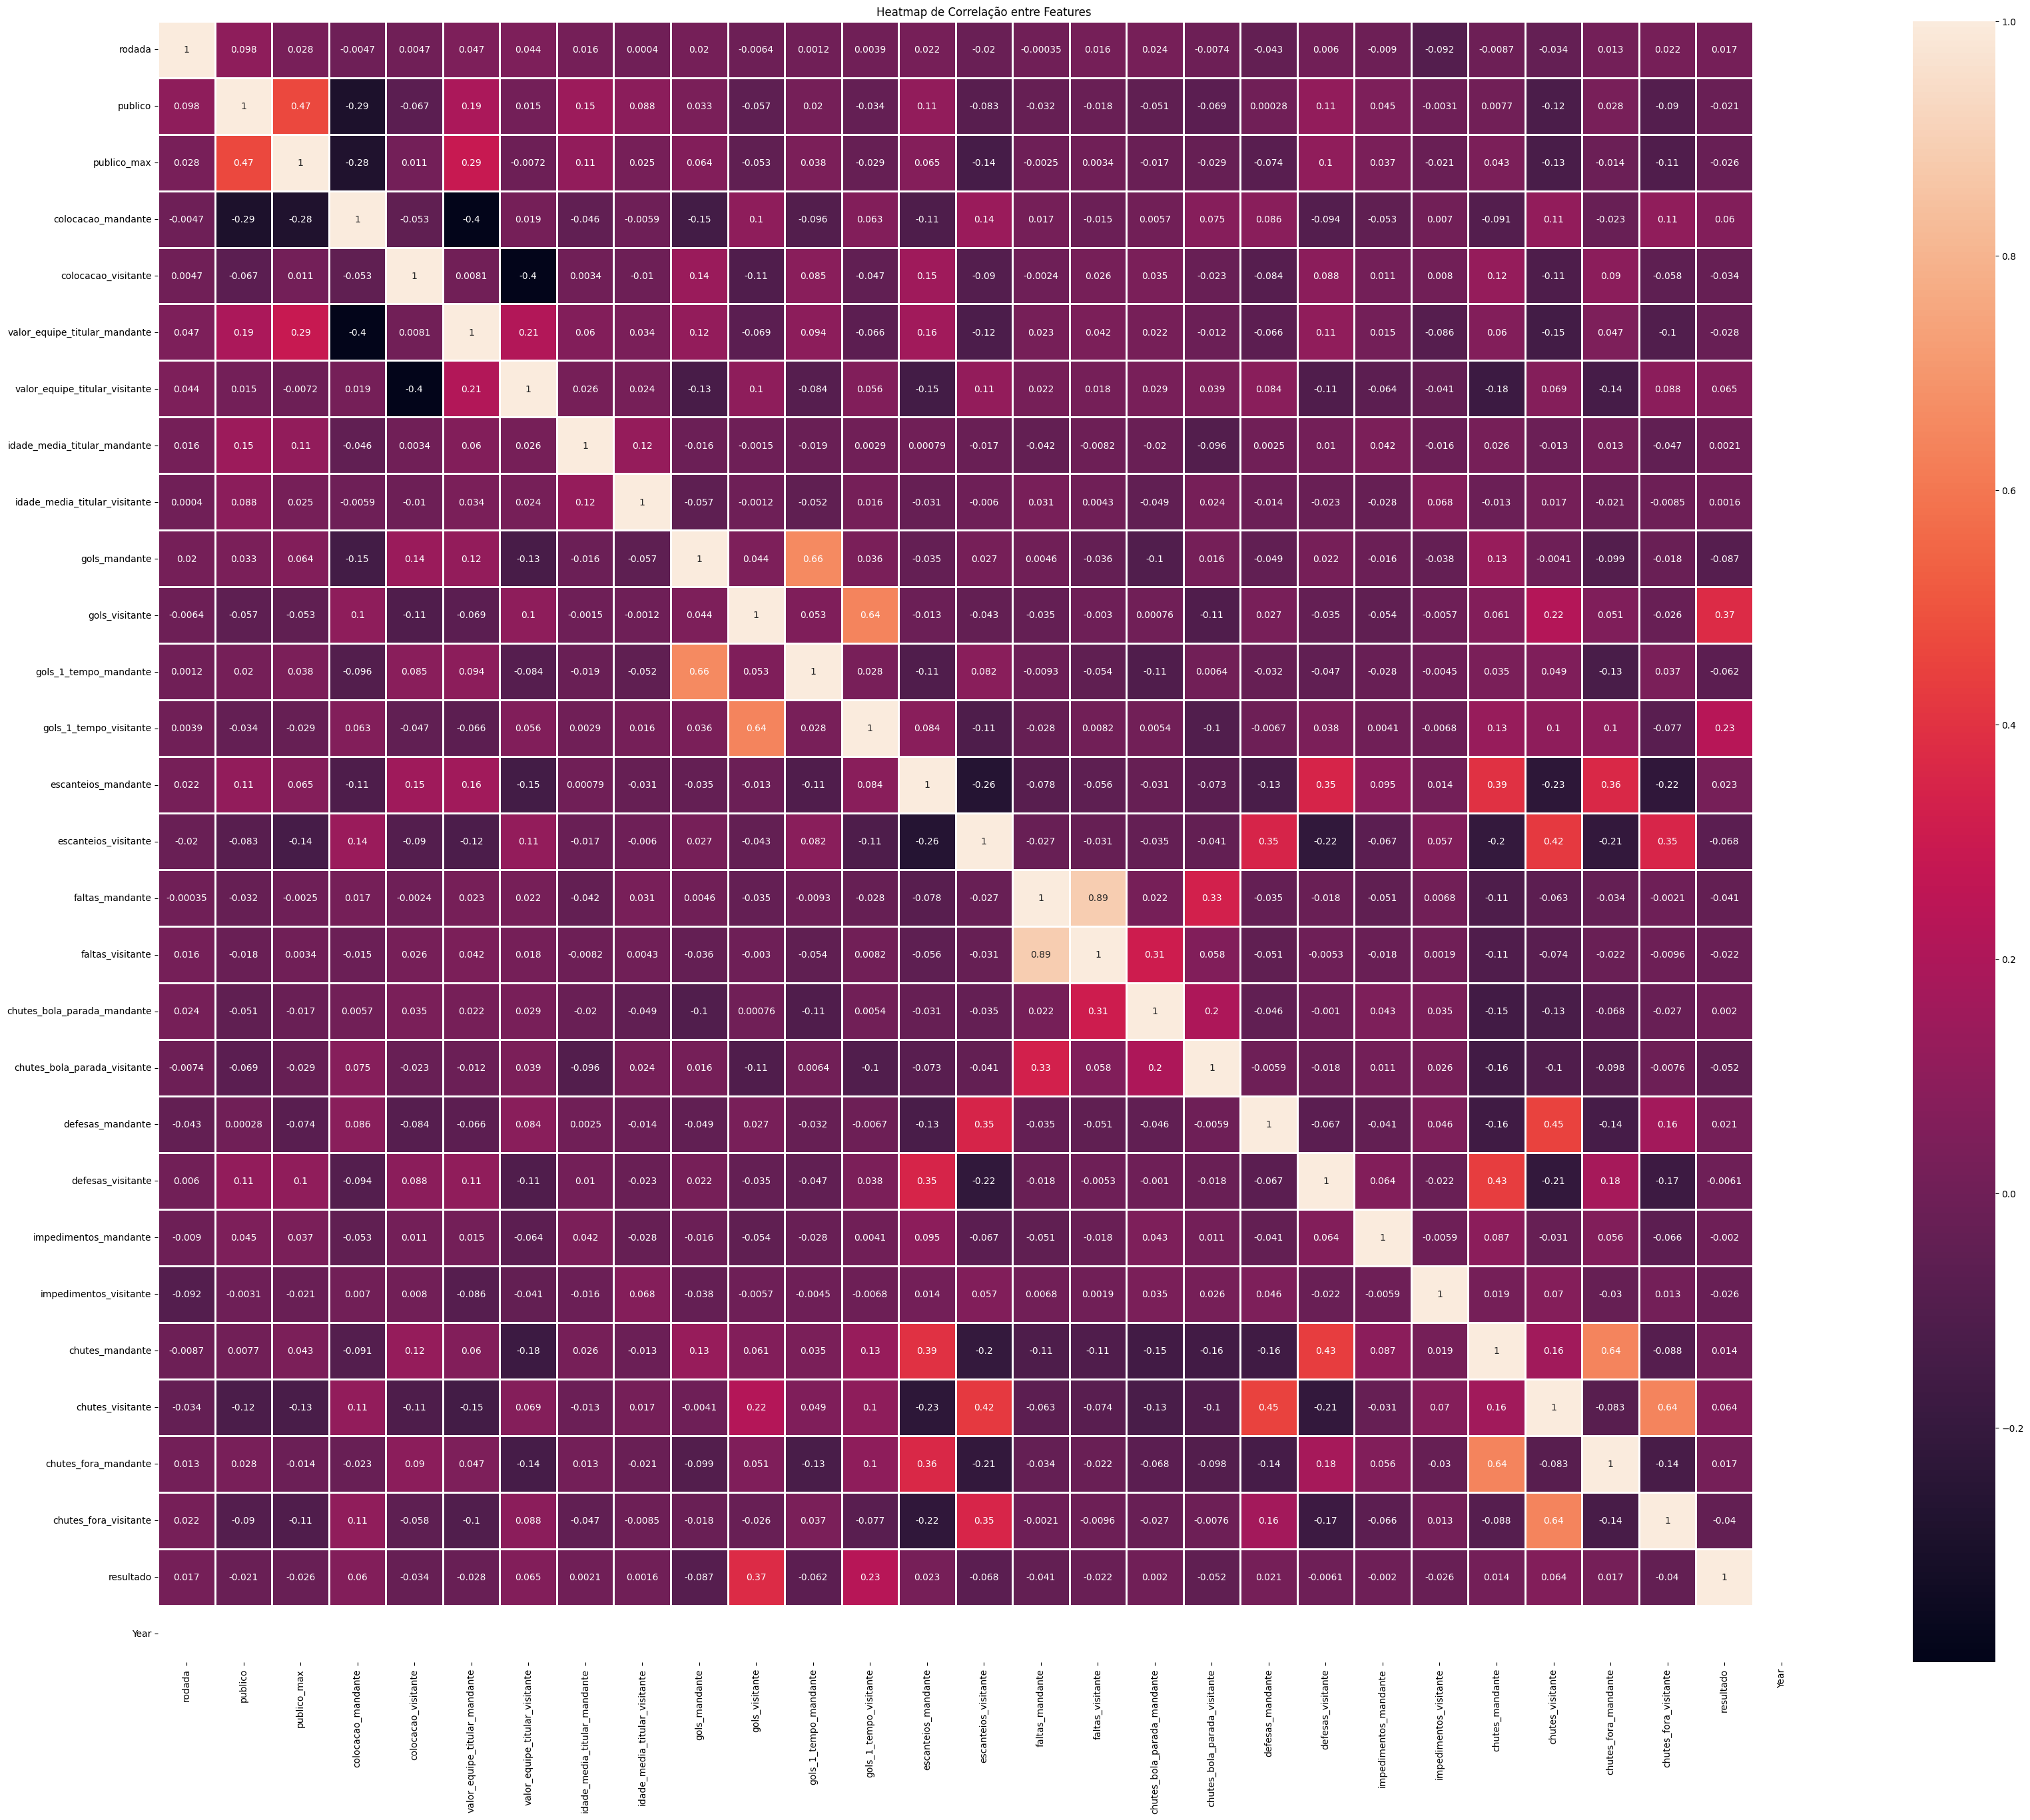

In [51]:
#Cálculo de Estatísticas Descritivas
removeDuplicated.describe()

# Convert 'ano_campeonato' column to datetime
removeDuplicated['ano_campeonato'] = pd.to_datetime(removeDuplicated['ano_campeonato'])

# Extract year from 'ano_campeonato' and create a new column 'Year'
removeDuplicated['Year'] = removeDuplicated['ano_campeonato'].dt.year

# Now compute the correlation matrix, only including numerical features
corr = removeDuplicated.select_dtypes(include=np.number).corr()

plt.figure(figsize=(40, 32))
sns.heatmap(corr, annot=True, linewidth=1)
plt.title('Heatmap de Correlação entre Features')
plt.show()

In [60]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling missing values
import joblib
import numpy as np

class YourModel:
    def __init__(self, hidden_layer_sizes=(500, 500), max_iter=5000, random_state=5):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.max_iter = max_iter
        self.random_state = random_state
        self.model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=random_state)

    def train_incremental(self, removeDuplicated, num_iterations=10000, percent_new_data=0.5):
        best_accuracy = 0
        best_iteration = 0
        accuracy = 0
        label_encoder_airportfrom = LabelEncoder()
        X = removeDuplicated[['colocacao_mandante', 'colocacao_visitante']]
        y = removeDuplicated['resultado']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

        # Initialize SimpleImputer to replace missing values with the mean
        imputer = SimpleImputer(strategy='mean')

        if (accuracy < 80):
          for iteration in range(num_iterations):
            try:
                self.model = joblib.load('modelo_treinado_best.pkl')
            except FileNotFoundError:
                pass

            novos_dados = removeDuplicated.sample(frac=percent_new_data, random_state=iteration)

            # Select the same columns for novas_etiquetas as in X_train
            novas_etiquetas = novos_dados[['colocacao_mandante', 'colocacao_visitante']]
            novas_etiquetas_y = novos_dados['resultado']

            # Impute missing values in X_train and convert back to DataFrame
            X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

            # Concatenate the new data to X_train and y_train
            X_train = pd.concat([X_train, novas_etiquetas])
            y_train = pd.concat([y_train, novas_etiquetas_y])

            # Impute missing values in X_train
            X_train = imputer.fit_transform(X_train)

            # Specify all possible classes when first training the model
            if iteration == 0:
                self.model.partial_fit(X_train, y_train, classes=np.unique(y))
            else:
                self.model.partial_fit(X_train, y_train)

            # Impute missing values in X_test before prediction
            X_test = imputer.transform(X_test)

            y_pred = self.model.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            print(f'Iteração {iteration + 1} - Acurácia: {accuracy * 100:.3f}%')

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_iteration = iteration
                joblib.dump(self.model, 'modelo_treinado_best.pkl')
                print("Modelo salvo")

        print(f'Melhor modelo encontrado na iteração {best_iteration + 1} com acurácia de {best_accuracy * 100:.3f}%')

# Uso da classe YourModel
your_model = YourModel()
your_model.train_incremental(removeDuplicated)

Iteração 1 - Acurácia: 50.719%
Modelo salvo


AttributeError: 'numpy.ndarray' object has no attribute 'columns'